In [189]:
import pickle
import numpy as np

In [190]:
with open('train_qa.txt', 'rb') as f:
    train_data=pickle.load(f)

In [191]:
with open('test_qa.txt', 'rb') as f:
    test_data=pickle.load(f)

In [192]:
len(train_data)

10000

In [193]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [194]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [195]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [196]:
train_data[0][2]

'no'

In [197]:
all_data=test_data+train_data

In [198]:
len(all_data)

11000

In [199]:
vocab=set()
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab=vocab.union(set(question))

In [200]:
vocab.add('no')
vocab.add('yes')
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [201]:
vocab_len=len(vocab) + 1
vocab_len

38

In [202]:
#longest story find
all_story_len=[len(data[0]) for data in all_data]
max_story_len=max(all_story_lens)

In [203]:
#longest story find
max_question_len=max([len(data[1]) for data in all_data])
max_question_len

6

In [204]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [205]:
tokenizer.word_index

{'is': 1,
 'down': 2,
 'hallway': 3,
 'john': 4,
 'to': 5,
 'bathroom': 6,
 'travelled': 7,
 'grabbed': 8,
 'in': 9,
 'milk': 10,
 'bedroom': 11,
 'discarded': 12,
 'yes': 13,
 'sandra': 14,
 'up': 15,
 'mary': 16,
 'went': 17,
 'back': 18,
 'the': 19,
 'left': 20,
 'journeyed': 21,
 'got': 22,
 'picked': 23,
 'put': 24,
 'garden': 25,
 '.': 26,
 'football': 27,
 'took': 28,
 'no': 29,
 'office': 30,
 'kitchen': 31,
 'dropped': 32,
 '?': 33,
 'apple': 34,
 'daniel': 35,
 'moved': 36,
 'there': 37}

In [206]:
train_story_text=[]
train_question_text=[]
train_answer=[]

In [207]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answer.append(answer)

In [208]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [209]:
len(train_story_seq)

10000

In [210]:
#train_story_seq
def vectorize_stories(data,word_index=tokenizer.word_index,
                      max_story_len=max_story_len,
                     max_question_len=max_question_len):
    #stories - x
    X=[]
    #qest
    Xq=[]
    #y= ans
    Y=[]
    
    for story,query,answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),
            np.array(Y))

In [211]:
input_train,queries_train,answer_train=vectorize_stories(train_data)
input_test,queries_test,answer_test=vectorize_stories(test_data)

In [212]:
input_test

array([[ 0,  0,  0, ..., 19, 11, 26],
       [ 0,  0,  0, ..., 19, 25, 26],
       [ 0,  0,  0, ..., 19, 25, 26],
       ...,
       [ 0,  0,  0, ..., 19, 34, 26],
       [ 0,  0,  0, ..., 19, 25, 26],
       [ 0,  0,  0, ..., 34, 37, 26]])

In [213]:
print(tokenizer.word_index['yes'])
print(tokenizer.word_index['no'])

13
29


In [214]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [215]:
#vectorization done for story,quest and answer
'''
now build a nn
input encoder m
input encoder c
question encoder
complete the n/w
'''

'\nnow build a nn\ninput encoder m\ninput encoder c\nquestion encoder\ncomplete the n/w\n'

In [216]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [217]:
#creating placeholder shape=(max_story_len,batch)
input_sequence = Input((max_story_len,)) #, used cause batch size is yet to find
question=Input((max_question_len,))

In [218]:
#input encoder M
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

#samples,storymax_len,embedding_dim


In [219]:
#input encoder C
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

#samples,storymax_len,embedding_dim

In [220]:
#question encoder
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#samples,storymax_len,embedding_dim

In [221]:
#encoder -> encoded input
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [222]:
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [223]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [224]:
answer = concatenate([response,question_encoded])
answer

<tf.Tensor 'concatenate_5/concat:0' shape=(?, 6, 220) dtype=float32>

In [225]:
answer=LSTM(32)(answer)

In [226]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_size)(answer) #sample,vocab size, yes or no

In [227]:
answer=Activation('softmax')(answer)
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [228]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_11 (Sequential)      multiple             2432        input_7[0][0]                    
__________________________________________________________________________________________________
sequential_13 (Sequential)      (None, 6, 64)        2432        input_8[0][0]                    
__________________________________________________________________________________________________
dot_4 (Dot

In [229]:
#fit

In [243]:
history=model.fit([input_train,queries_train],answer_train,
                 batch_size=32,epochs=2,validation_data=([input_test,
                                                         queries_test],answer_test))


Train on 10000 samples, validate on 1000 samples
Epoch 1/2
10000/10000 [==============================] - 9s 857us/step - loss: 0.6959 - acc: 0.4979 - val_loss: 0.6933 - val_acc: 0.5030
Epoch 2/2
10000/10000 [==============================] - 9s 908us/step - loss: 0.6948 - acc: 0.4953 - val_loss: 0.6931 - val_acc: 0.5030


In [244]:
history.history['acc']

[0.4979, 0.4953]

In [ ]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


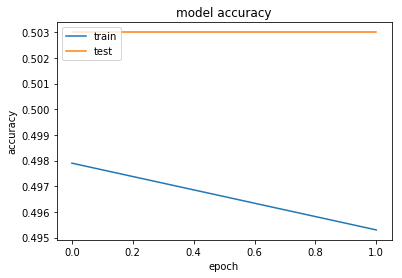

In [245]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
filename = 'new_chatbot_120_epochs.h5'
model.save(filename)

In [246]:
#load already trained model
model.load_weights('chatbot_10.h5')
pred_results = model.predict(([input_test, queries_test]))

In [247]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [248]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [249]:
test_data[0][2]

'no'

In [250]:
val_max=np.argmax(pred_results[0])

In [251]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  the
Probability of certainty was:  0.9744813


In [252]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [253]:
#own question
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [254]:
my_question = "Is the football in the garden ?"

In [255]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [256]:
my_story,my_ques,my_ans = vectorize_stories(mydata)
pred_results = model.predict(([ my_story, my_ques]))

In [257]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  the
Probability of certainty was:  0.99610597
